In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_validate
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,confusion_matrix,classification_report

In [5]:
from sklearn.metrics import roc_curve,roc_auc_score,mean_squared_error,r2_score

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df["Outcome"].value_counts(normalize=True)

0   0.65
1   0.35
Name: Outcome, dtype: float64

In [9]:
df.shape

(768, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<AxesSubplot:xlabel='Pregnancies'>

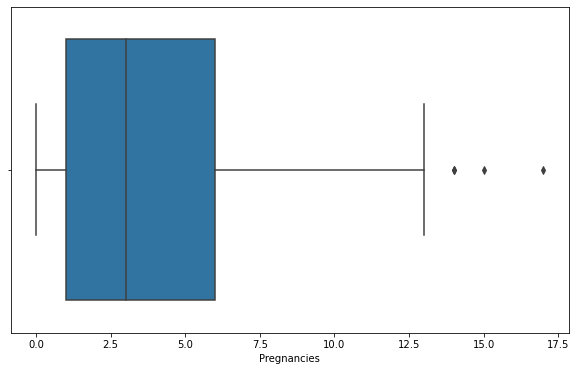

In [12]:
sns.boxplot(df["Pregnancies"])

In [13]:
df = df.loc[~(df["Pregnancies"] > 13)]

<AxesSubplot:xlabel='Pregnancies'>

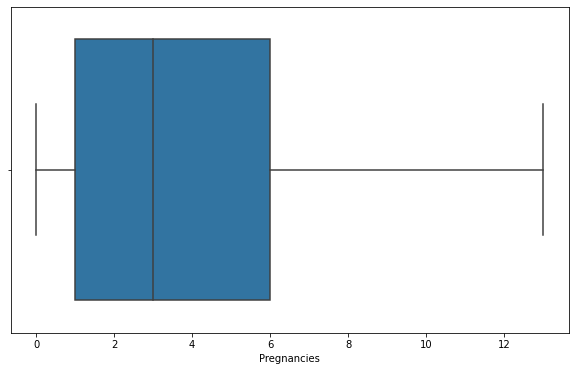

In [14]:
sns.boxplot(df["Pregnancies"])

In [15]:
df.shape

(764, 9)

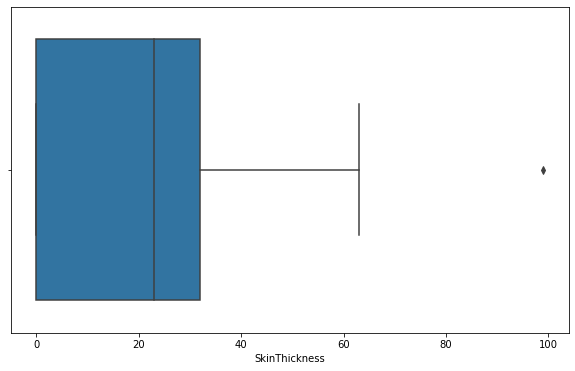

In [16]:
sns.boxplot(df["SkinThickness"],orient="v");

In [17]:
df = df[df["SkinThickness"]<70]

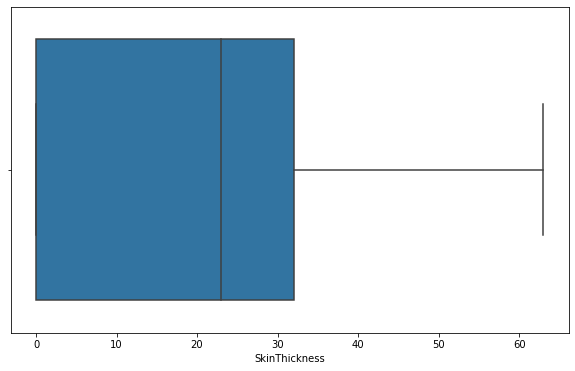

In [18]:
sns.boxplot(df["SkinThickness"],orient="v");

In [19]:
df.shape

(763, 9)

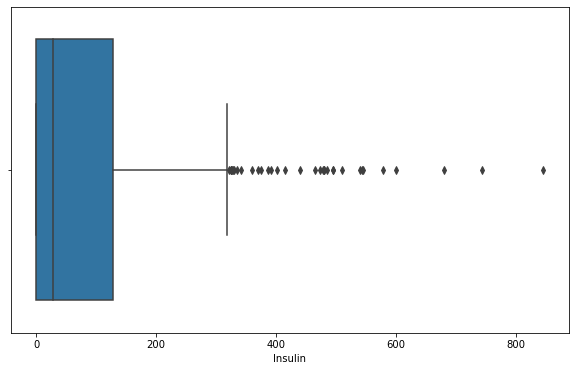

In [20]:
sns.boxplot(df["Insulin"],orient="v");

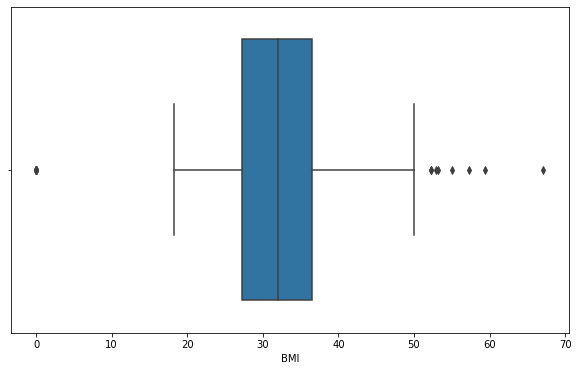

In [21]:
sns.boxplot(df["BMI"],orient="v");

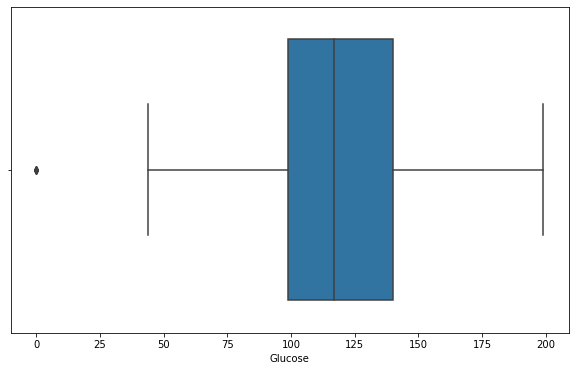

In [22]:
sns.boxplot(df["Glucose"],orient="v");

In [23]:
df = df[df["Glucose"]>0]

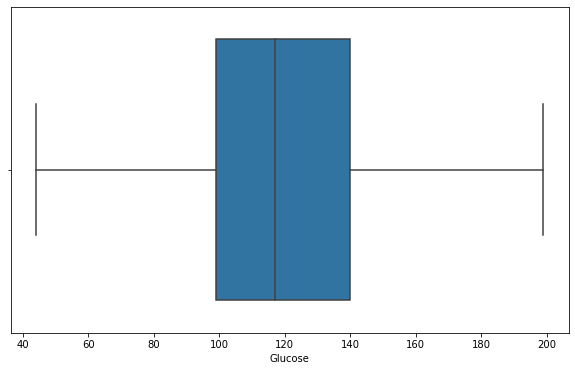

In [24]:
sns.boxplot(df["Glucose"],orient="v");

In [25]:
df = df[df["BMI"]>0]

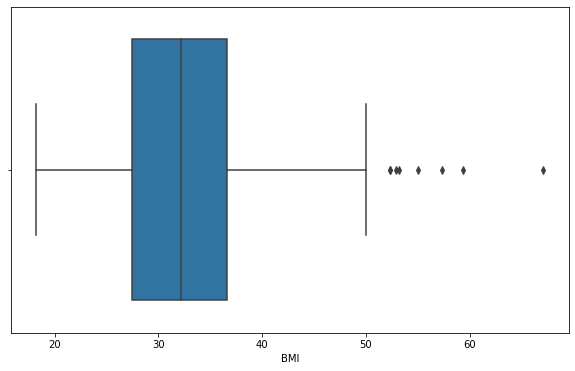

In [26]:
sns.boxplot(df["BMI"],orient="v");

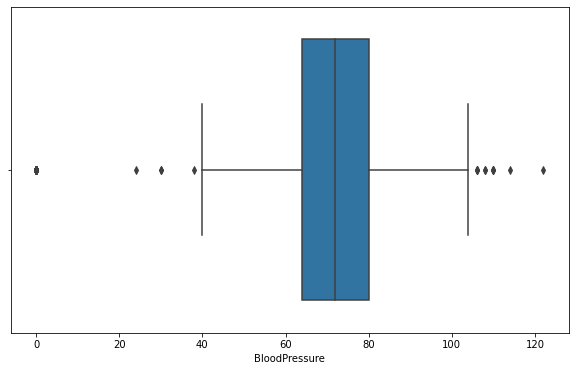

In [27]:
sns.boxplot(df["BloodPressure"],orient="v");

In [28]:
df = df[df["BloodPressure"]>30]

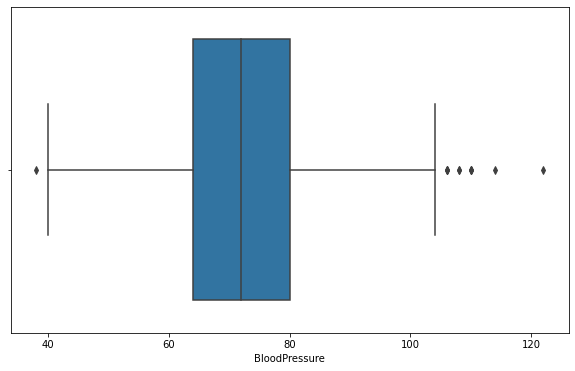

In [29]:
sns.boxplot(df["BloodPressure"],orient="v");

In [30]:
df["Outcome"].value_counts(normalize=True)

0   0.66
1   0.34
Name: Outcome, dtype: float64

In [31]:
df["Outcome"].value_counts()

0    473
1    243
Name: Outcome, dtype: int64

<AxesSubplot:>

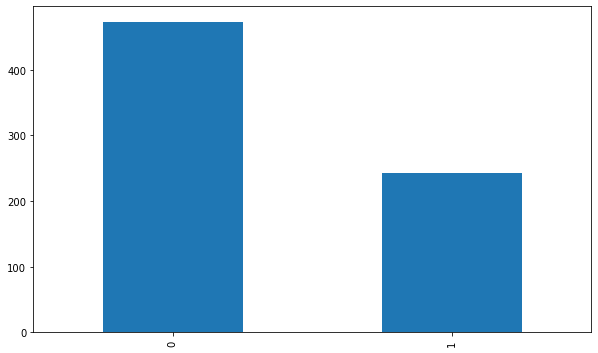

In [32]:
df["Outcome"].value_counts().plot.bar()

<AxesSubplot:>

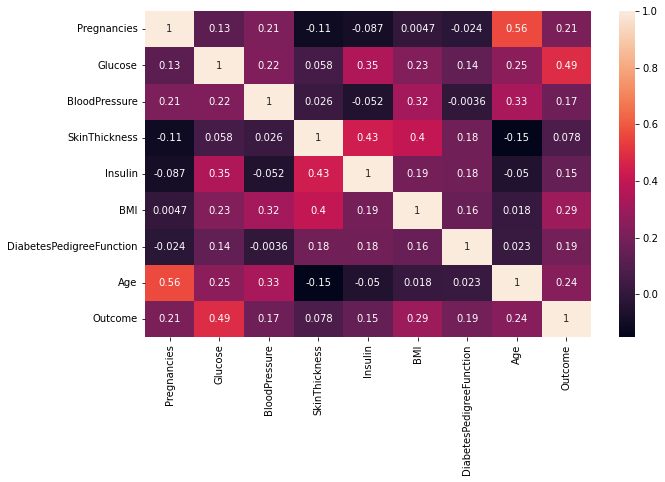

In [33]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

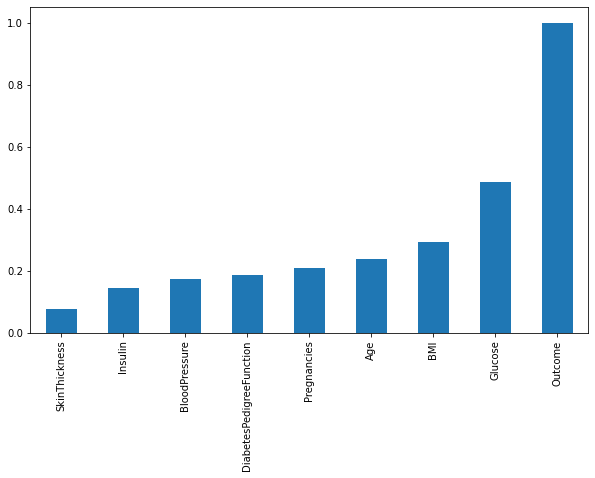

In [34]:
df.corr()["Outcome"].sort_values().plot.bar()

In [35]:
df.shape

(716, 9)

In [36]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
X_train.shape

(572, 8)

In [39]:
log_model = LogisticRegression()
log_model 

LogisticRegression()

In [40]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [41]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [42]:
confusion_matrix(y_test,y_pred)

array([[90,  7],
       [23, 24]], dtype=int64)

In [43]:
from sklearn.metrics import  plot_confusion_matrix

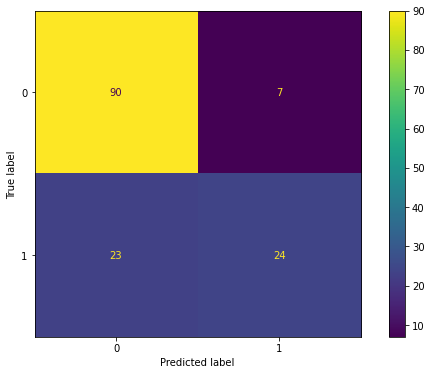

In [44]:
plot_confusion_matrix(log_model, X_test, y_test);

In [45]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.93      0.86        97\n           1       0.77      0.51      0.62        47\n\n    accuracy                           0.79       144\n   macro avg       0.79      0.72      0.74       144\nweighted avg       0.79      0.79      0.78       144\n'

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        97
           1       0.77      0.51      0.62        47

    accuracy                           0.79       144
   macro avg       0.79      0.72      0.74       144
weighted avg       0.79      0.79      0.78       144



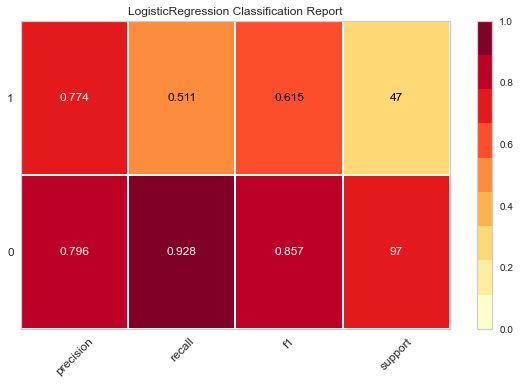

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [47]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model,support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure